# 2. Undersampling and Oversampling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from imblearn import over_sampling, under_sampling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedShuffleSplit, train_test_split
from sklearn.metrics import recall_score, precision_score, accuracy_score, make_scorer, confusion_matrix, average_precision_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import fraudutils as futils
from fraudutils import classify
import warnings

warnings.filterwarnings(action='once')

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
cc_df = pd.read_csv('../../../data/raw/give-me-some-credit/cs-training.csv')
del cc_df['Unnamed: 0']
cc_df = cc_df.fillna(0)
X_ = cc_df.drop(['SeriousDlqin2yrs'], axis=1)
y_ = cc_df['SeriousDlqin2yrs'].values

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=0, stratify=y_)

In [3]:
print("Train Data:")
print("Non-fraudulent: {}".format(len([x for x in y_train if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_train if x == 1])))

print("\nTest Data:")
print("Non-fraudulent: {}".format(len([x for x in y_test if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_test if x == 1])))

Train Data:
Non-fraudulent: 111979
Fraudulent: 8021

Test Data:
Non-fraudulent: 27995
Fraudulent: 2005


In [4]:
logistic_regression_scores = {}
decision_tree_scores = {}
naive_bayes_scores = {}
knn_scores = {}

## No sampling applied

Logistic regression results:
Mean accuracy: 0.9338666666666666
Mean precision: 0.5766423357664233
Mean recall: 0.03940149625935162
AUPRC: 0.0869205708356845
AUROC: 0.5186648488619494


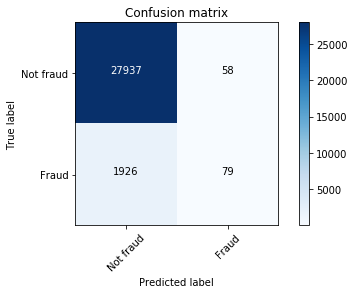

Decision tree results:
Mean accuracy: 0.8984666666666666
Mean precision: 0.2624372432679142
Mean recall: 0.286783042394015
AUPRC: 0.12292921772853732
AUROC: 0.6145292243582863


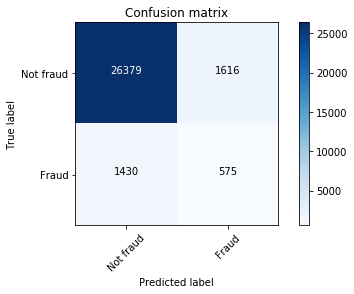

Naive Bayes results:
Mean accuracy: 0.9324333333333333
Mean precision: 0.39215686274509803
Mean recall: 0.0199501246882793
AUPRC: 0.07332357830912914
AUROC: 0.5088677217476046


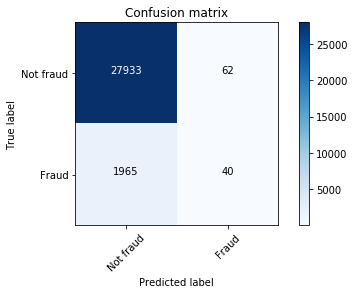

KNN results:
Mean accuracy: 0.9323666666666667
Mean precision: 0.39285714285714285
Mean recall: 0.021945137157107233
AUPRC: 0.07398797054981593
AUROC: 0.5097580659888056


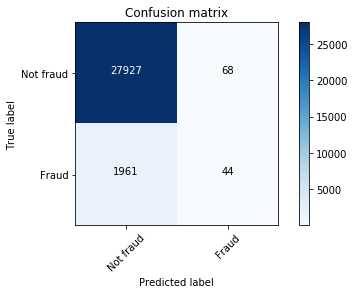

In [5]:
print("Logistic regression results:")
logistic_regression_scores['normal'] = classify(X_train, X_test, y_train, y_test, classifier=LogisticRegression, normalized=False)
print("Decision tree results:")
decision_tree_scores['normal'] = classify(X_train, X_test, y_train, y_test, classifier=DecisionTreeClassifier, normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['normal'] = classify(X_train, X_test, y_train, y_test, classifier=GaussianNB, normalized=False)
print("KNN results:")
knn_scores['normal'] = classify(X_train, X_test, y_train, y_test, classifier=KNeighborsClassifier, normalized=False)

## Oversampling: Random

In [6]:
ros = over_sampling.RandomOverSampler(random_state=0)
X_oversampled, y_oversampled = ros.fit_sample(X_train, y_train)

Logistic regression results:
Mean accuracy: 0.7909666666666667
Mean precision: 0.18933877075444216
Mean recall: 0.6483790523690773
AUPRC: 0.14626329275849118
AUROC: 0.7247789171472105


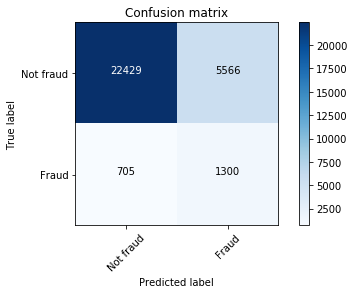

Decision tree results:
Mean accuracy: 0.9007
Mean precision: 0.25552208835341367
Mean recall: 0.2538653366583541
AUPRC: 0.11473486765015173
AUROC: 0.6004457956733457


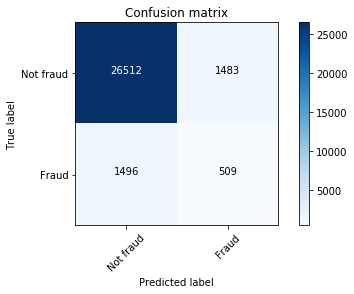

Naive Bayes results:
Mean accuracy: 0.9299666666666667
Mean precision: 0.336734693877551
Mean recall: 0.04937655860349127
AUPRC: 0.08016013367940691
AUROC: 0.5212055145223208


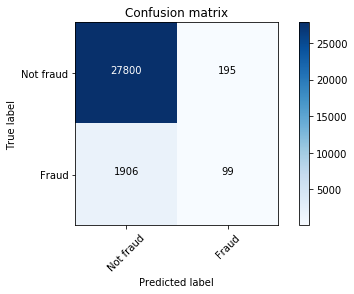

KNN results:
Mean accuracy: 0.8284333333333334
Mean precision: 0.11905916585838991
Mean recall: 0.24488778054862842
AUPRC: 0.0796228015476988
AUROC: 0.557557303383798


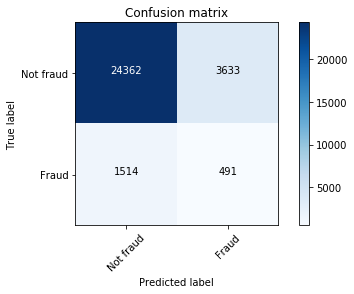

In [7]:
print("Logistic regression results:")
logistic_regression_scores['random_os'] = classify(X_oversampled,
                                                     X_test,
                                                     y_oversampled,
                                                     y_test,
                                                     classifier=LogisticRegression,
                                                     normalized=False)
print("Decision tree results:")
decision_tree_scores['random_os'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=DecisionTreeClassifier, normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['random_os'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=GaussianNB, normalized=False)
print("KNN results:")
knn_scores['random_os'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=KNeighborsClassifier, normalized=False)

## Oversampling: SMOTE

In [8]:
smote = over_sampling.SMOTE(random_state=0)
X_oversampled, y_oversampled = smote.fit_sample(X_train, y_train)

Logistic regression results:
Mean accuracy: 0.8267666666666666
Mean precision: 0.21921182266009853
Mean recall: 0.6214463840399003
AUPRC: 0.16152839453091408
AUROC: 0.7314590377066799


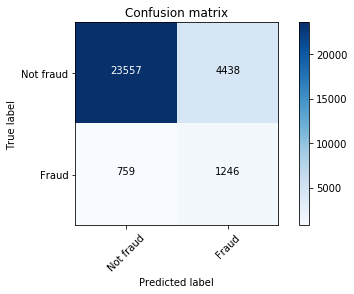

Decision tree results:
Mean accuracy: 0.8912666666666667
Mean precision: 0.23975155279503105
Mean recall: 0.2887780548628429
AUPRC: 0.11676832039982858
AUROC: 0.6115974575082208


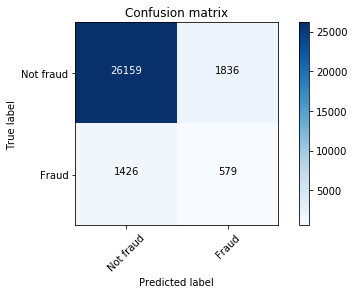

Naive Bayes results:
Mean accuracy: 0.9329
Mean precision: 0.48
Mean recall: 0.047880299251870324
AUPRC: 0.08661587697423109
AUROC: 0.5220826750769085


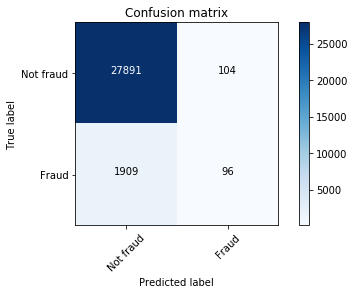

KNN results:
Mean accuracy: 0.7527333333333334
Mean precision: 0.10860448300795372
Mean recall: 0.3745635910224439
AUPRC: 0.08247928515659514
AUROC: 0.5771907078169909


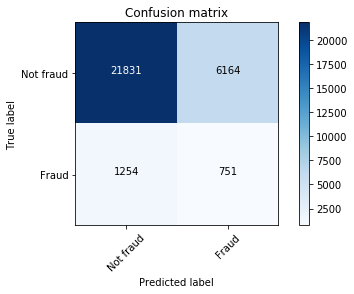

In [9]:
print("Logistic regression results:")
logistic_regression_scores['smote'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=LogisticRegression, normalized=False)
print("Decision tree results:")
decision_tree_scores['smote'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=DecisionTreeClassifier, normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['smote'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=GaussianNB, normalized=False)
print("KNN results:")
knn_scores['smote'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=KNeighborsClassifier, normalized=False)


## Oversampling: ADASYN

In [10]:
adasyn = over_sampling.ADASYN(random_state=0)
X_oversampled, y_oversampled = adasyn.fit_sample(X_train, y_train)

Logistic regression results:
Mean accuracy: 0.8290333333333333
Mean precision: 0.22146932952924395
Mean recall: 0.6194513715710723
AUPRC: 0.1626228132711493
AUROC: 0.7317474753908229


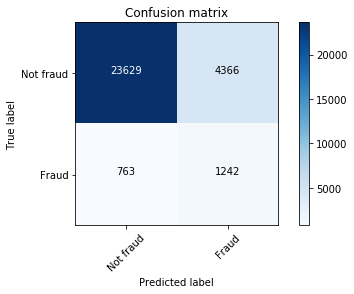

Decision tree results:
Mean accuracy: 0.8917333333333334
Mean precision: 0.248074584515606
Mean recall: 0.3052369077306733
AUPRC: 0.12215485239744847
AUROC: 0.6194875376302947


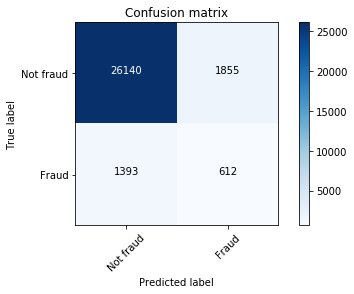

Naive Bayes results:
Mean accuracy: 0.9173333333333333
Mean precision: 0.33676975945017185
Mean recall: 0.24438902743142144
AUPRC: 0.13280283398034123
AUROC: 0.6049592931406081


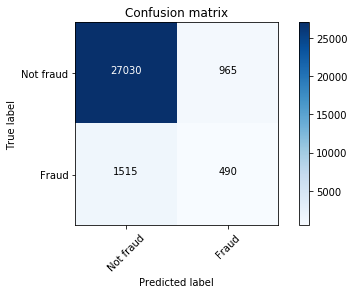

KNN results:
Mean accuracy: 0.7512666666666666
Mean precision: 0.1087050050193604
Mean recall: 0.37805486284289275
AUPRC: 0.08266312242959692
AUROC: 0.5780254667849042


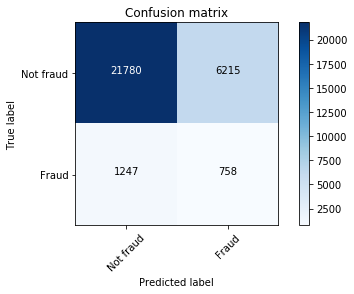

In [11]:
print("Logistic regression results:")
logistic_regression_scores['adasyn'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=LogisticRegression, normalized=False)
print("Decision tree results:")
decision_tree_scores['adasyn'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=DecisionTreeClassifier, normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['adasyn'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=GaussianNB, normalized=False)
print("KNN results:")
knn_scores['adasyn'] = classify(X_oversampled, X_test, y_oversampled, y_test, classifier=KNeighborsClassifier, normalized=False)

## Undersampling: Random

In [12]:
rus = under_sampling.RandomUnderSampler(random_state=0)
X_undersampled, y_undersampled = rus.fit_sample(X_train, y_train)

Logistic regression results:
Mean accuracy: 0.7733666666666666
Mean precision: 0.1766927434583221
Mean recall: 0.6533665835411472
AUPRC: 0.13861180079654295
AUROC: 0.7176638240084732


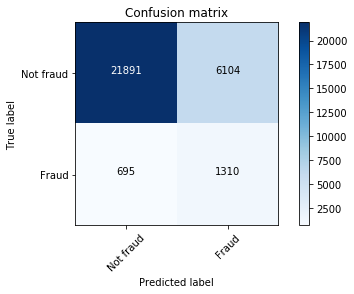

Decision tree results:
Mean accuracy: 0.6955
Mean precision: 0.1442115768463074
Mean recall: 0.7206982543640897
AUPRC: 0.12259969835889319
AUROC: 0.7071967785483604


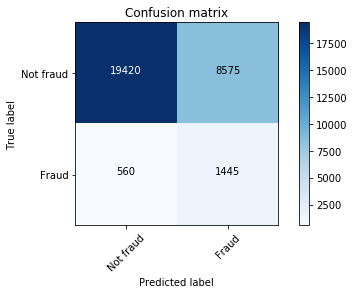

Naive Bayes results:
Mean accuracy: 0.9147666666666666
Mean precision: 0.22064777327935223
Mean recall: 0.1087281795511222
AUPRC: 0.08355729737733937
AUROC: 0.5406116339798832


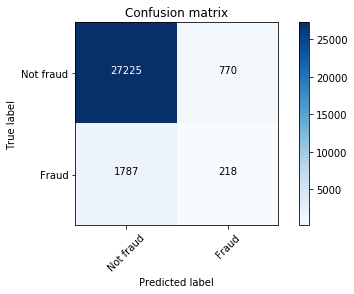

KNN results:
Mean accuracy: 0.6049
Mean precision: 0.0916404047105656
Mean recall: 0.5511221945137157
AUPRC: 0.08050506095021195
AUROC: 0.5799368786463917


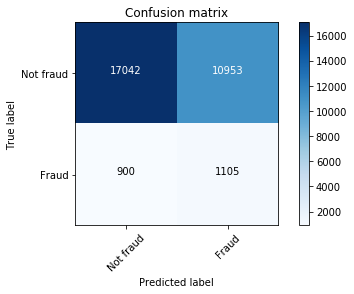

In [13]:
print("Logistic regression results:")
logistic_regression_scores['random_us'] = classify(X_undersampled, X_test, y_undersampled, y_test, classifier=LogisticRegression, normalized=False)
print("Decision tree results:")
decision_tree_scores['random_us'] = classify(X_undersampled, X_test, y_undersampled, y_test, classifier=DecisionTreeClassifier, normalized=False)
print("Naive Bayes results:")
naive_bayes_scores['random_us'] = classify(X_undersampled, X_test, y_undersampled, y_test, classifier=GaussianNB, normalized=False)
print("KNN results:")
knn_scores['random_us'] = classify(X_undersampled, X_test, y_undersampled, y_test, classifier=KNeighborsClassifier, normalized=False)

## Scores

### Logistic regression scores

In [14]:
logistic_regression_df = pd.DataFrame(logistic_regression_scores)
logistic_regression_df

,normal,random_os,smote,adasyn,random_us
AUPRC,0.086921,0.146263,0.161528,0.162623,0.138612
AUROC,0.518665,0.724779,0.731459,0.731747,0.717664
accuracy,0.933867,0.790967,0.826767,0.829033,0.773367
precision,0.576642,0.189339,0.219212,0.221469,0.176693
recall,0.039401,0.648379,0.621446,0.619451,0.653367


### Decision tree scores

In [15]:
decision_tree_df = pd.DataFrame(decision_tree_scores)
decision_tree_df

,normal,random_os,smote,adasyn,random_us
AUPRC,0.122929,0.114735,0.116768,0.122155,0.122600
AUROC,0.614529,0.600446,0.611597,0.619488,0.707197
accuracy,0.898467,0.900700,0.891267,0.891733,0.695500
precision,0.262437,0.255522,0.239752,0.248075,0.144212
recall,0.286783,0.253865,0.288778,0.305237,0.720698


### Naive Bayes scores

In [16]:
naive_bayes_df = pd.DataFrame(naive_bayes_scores)
naive_bayes_df

,normal,random_os,smote,adasyn,random_us
AUPRC,0.073324,0.080160,0.086616,0.132803,0.083557
AUROC,0.508868,0.521206,0.522083,0.604959,0.540612
accuracy,0.932433,0.929967,0.932900,0.917333,0.914767
precision,0.392157,0.336735,0.480000,0.336770,0.220648
recall,0.019950,0.049377,0.047880,0.244389,0.108728


### KNN scores

In [17]:
knn_df = pd.DataFrame(knn_scores)
knn_df

,normal,random_os,smote,adasyn,random_us
AUPRC,0.073988,0.079623,0.082479,0.082663,0.080505
AUROC,0.509758,0.557557,0.577191,0.578025,0.579937
accuracy,0.932367,0.828433,0.752733,0.751267,0.604900
precision,0.392857,0.119059,0.108604,0.108705,0.091640
recall,0.021945,0.244888,0.374564,0.378055,0.551122
